## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0717 16:01:32.103789 4622341568 deprecation.py:323] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 16:01:32.148979 4622341568 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.2597 - acc: 0.1573 - val_loss: 2.2099 - val_acc: 0.1970
Epoch 2/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.1776 - acc: 0.2177 - val_loss: 2.1420 - val_acc: 0.2343
Epoch 3/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.1181 - acc: 0.2515 - val_loss: 2.0894 - val_acc: 0.2642
Epoch 4/500
50000/50000 [==============================] - 3s 60us/step - loss: 2.0697 - acc: 0.2746 - val_loss: 2.0460 - val_acc: 0.2777
Epoch 5/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.0297 - acc: 0.2897 - val_loss: 2.0101 - val_acc: 0.2990
Epoch 6/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9969 - acc: 0.3010 - val_loss: 1.9806 - val_acc: 0.3072
Epoch 7/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9698 - acc: 0.3116 - val_loss: 1.9559 - 

50000/50000 [==============================] - 3s 54us/step - loss: 1.6399 - acc: 0.4305 - val_loss: 1.6479 - val_acc: 0.4271
Epoch 60/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6372 - acc: 0.4313 - val_loss: 1.6443 - val_acc: 0.4287
Epoch 61/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6342 - acc: 0.4314 - val_loss: 1.6407 - val_acc: 0.4314
Epoch 62/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6307 - acc: 0.4351 - val_loss: 1.6383 - val_acc: 0.4341
Epoch 63/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6279 - acc: 0.4354 - val_loss: 1.6359 - val_acc: 0.4317
Epoch 64/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.6252 - acc: 0.4352 - val_loss: 1.6329 - val_acc: 0.4349
Epoch 65/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6222 - acc: 0.4374 - val_loss: 1.6328 - val_acc: 0.4303
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.5040 - acc: 0.4765 - val_loss: 1.5320 - val_acc: 0.4599
Epoch 119/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.5020 - acc: 0.4783 - val_loss: 1.5313 - val_acc: 0.4625
Epoch 120/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5004 - acc: 0.4797 - val_loss: 1.5300 - val_acc: 0.4622
Epoch 121/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4984 - acc: 0.4784 - val_loss: 1.5266 - val_acc: 0.4651
Epoch 122/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4966 - acc: 0.4799 - val_loss: 1.5284 - val_acc: 0.4599
Epoch 123/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4949 - acc: 0.4800 - val_loss: 1.5266 - val_acc: 0.4649
Epoch 124/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4933 - acc: 0.4805 - val_loss: 1.5258 - val_acc: 0.4670
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 55us/step - loss: 1.4104 - acc: 0.5096 - val_loss: 1.4645 - val_acc: 0.4832
Epoch 177/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4086 - acc: 0.5102 - val_loss: 1.4800 - val_acc: 0.4792
Epoch 178/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4072 - acc: 0.5113 - val_loss: 1.4645 - val_acc: 0.4819
Epoch 179/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4058 - acc: 0.5106 - val_loss: 1.4723 - val_acc: 0.4828
Epoch 180/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4041 - acc: 0.5122 - val_loss: 1.4633 - val_acc: 0.4842
Epoch 181/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4029 - acc: 0.5113 - val_loss: 1.4618 - val_acc: 0.4809
Epoch 182/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4018 - acc: 0.5122 - val_loss: 1.4649 - val_acc: 0.4815
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 63us/step - loss: 1.3308 - acc: 0.5367 - val_loss: 1.4201 - val_acc: 0.4974
Epoch 235/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.3297 - acc: 0.5367 - val_loss: 1.4138 - val_acc: 0.4999
Epoch 236/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3281 - acc: 0.5388 - val_loss: 1.4211 - val_acc: 0.4954
Epoch 237/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3270 - acc: 0.5378 - val_loss: 1.4188 - val_acc: 0.4971
Epoch 238/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3258 - acc: 0.5392 - val_loss: 1.4182 - val_acc: 0.4945
Epoch 239/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3248 - acc: 0.5377 - val_loss: 1.4153 - val_acc: 0.4976
Epoch 240/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.3232 - acc: 0.5384 - val_loss: 1.4411 - val_acc: 0.4897
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 1.2615 - acc: 0.5607 - val_loss: 1.4018 - val_acc: 0.5060
Epoch 293/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.2596 - acc: 0.5607 - val_loss: 1.3933 - val_acc: 0.5057
Epoch 294/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.2589 - acc: 0.5629 - val_loss: 1.4099 - val_acc: 0.5049
Epoch 295/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2577 - acc: 0.5617 - val_loss: 1.3878 - val_acc: 0.5080
Epoch 296/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.2560 - acc: 0.5622 - val_loss: 1.4092 - val_acc: 0.5036
Epoch 297/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.2553 - acc: 0.5615 - val_loss: 1.3924 - val_acc: 0.5064
Epoch 298/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2546 - acc: 0.5625 - val_loss: 1.3785 - val_acc: 0.5123
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 70us/step - loss: 1.1969 - acc: 0.5819 - val_loss: 1.3676 - val_acc: 0.5167
Epoch 351/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1956 - acc: 0.5825 - val_loss: 1.4016 - val_acc: 0.5036
Epoch 352/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.1940 - acc: 0.5833 - val_loss: 1.3694 - val_acc: 0.5151
Epoch 353/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.1937 - acc: 0.5843 - val_loss: 1.3718 - val_acc: 0.5157
Epoch 354/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1920 - acc: 0.5850 - val_loss: 1.3777 - val_acc: 0.5135
Epoch 355/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1921 - acc: 0.5840 - val_loss: 1.3562 - val_acc: 0.5210
Epoch 356/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1900 - acc: 0.5848 - val_loss: 1.3594 - val_acc: 0.5206
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.1373 - acc: 0.6032 - val_loss: 1.4041 - val_acc: 0.5057
Epoch 409/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1365 - acc: 0.6019 - val_loss: 1.3769 - val_acc: 0.5169
Epoch 410/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1348 - acc: 0.6030 - val_loss: 1.3493 - val_acc: 0.5239
Epoch 411/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.1338 - acc: 0.6044 - val_loss: 1.3556 - val_acc: 0.5202
Epoch 412/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1330 - acc: 0.6052 - val_loss: 1.3478 - val_acc: 0.5233
Epoch 413/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1329 - acc: 0.6045 - val_loss: 1.3869 - val_acc: 0.5098
Epoch 414/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1307 - acc: 0.6058 - val_loss: 1.3550 - val_acc: 0.5209
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 54us/step - loss: 1.0780 - acc: 0.6255 - val_loss: 1.3378 - val_acc: 0.5267
Epoch 467/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0781 - acc: 0.6250 - val_loss: 1.4339 - val_acc: 0.5008
Epoch 468/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0770 - acc: 0.6238 - val_loss: 1.3503 - val_acc: 0.5258
Epoch 469/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0754 - acc: 0.6244 - val_loss: 1.3687 - val_acc: 0.5166
Epoch 470/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.0754 - acc: 0.6256 - val_loss: 1.3320 - val_acc: 0.5316
Epoch 471/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0742 - acc: 0.6241 - val_loss: 1.3802 - val_acc: 0.5161
Epoch 472/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.0724 - acc: 0.6259 - val_loss: 1.3538 - val_acc: 0.5207
Epoch 473/500
50000/50000 [=======

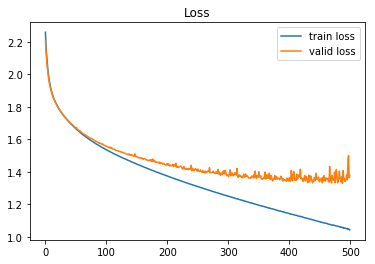

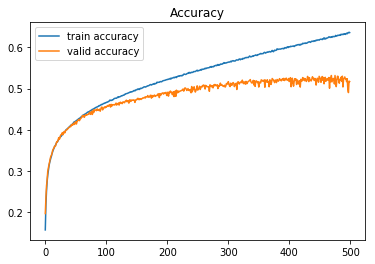

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()